In [1]:
# In Google Sheets file go to File > Publish to the web > Select .csv (see screenshot) > Copy link
import pandas as pd

path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRLTluwfx_4g1apysywBGuejJAS61cBuG5gNfS97b3_p0KqdfyyuNiyLRH7fp4LBSE5yMzQ9pFQiiJg/pub?output=csv'
df_segmentation = pd.read_csv(path)
df_segmentation

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [2]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

In [3]:
df_segmentation.describe().astype('int64')

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000,2000,2000,2000,2000,2000,2000,2000
mean,100001000,0,0,35,1,120954,0,0
std,577,0,0,11,0,38108,0,0
min,100000001,0,0,18,0,35832,0,0
25%,100000500,0,0,27,1,97663,0,0
50%,100001000,0,0,33,1,115548,1,1
75%,100001500,1,1,42,1,138072,1,1
max,100002000,1,1,76,3,309364,2,2




*   Mean sex= male
*   Mean marital status= single


*   Mean Age= 35,Median age= 33
*   Education = High school

*   Mean income =120K, Median income= 115K
*   Mean occupattion = Unemployeed , Median = Skilled employee


*   Mean Settlement size = small city, Median Settlement size = Mid sized city












In [4]:
df_segmentation.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


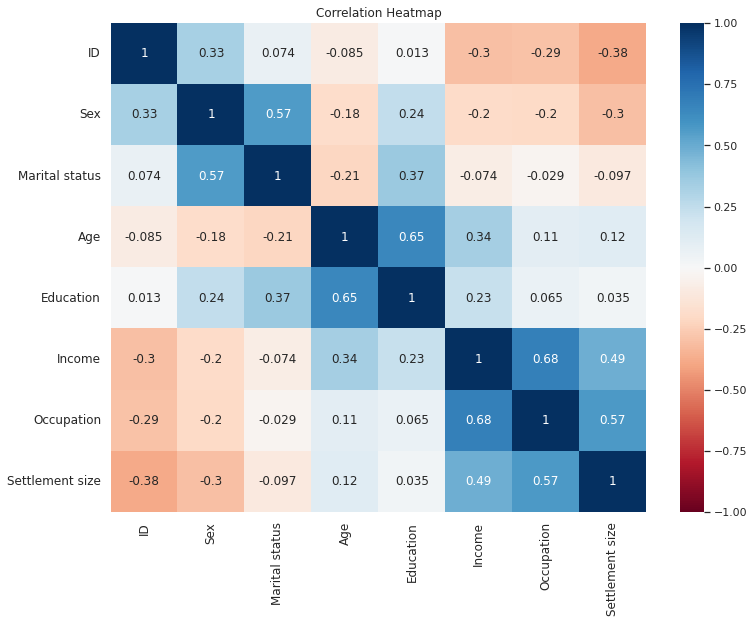

In [5]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()



*   Age and Education are positively correlated
*   Income , occupation and city size are positively correlated





Text(0.5, 1.0, 'Visualization of raw data')

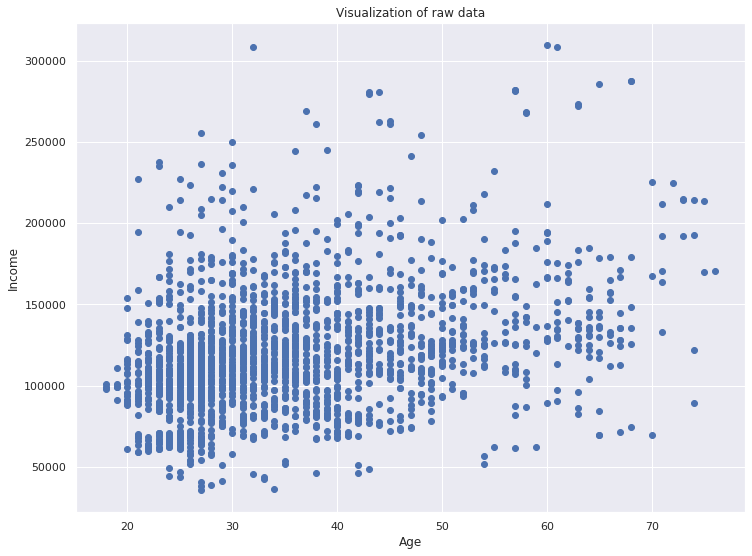

In [6]:
plt.figure(figsize = (12, 9))
plt.scatter('Age','Income', data= df_segmentation)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

Age and income are losely correlated.


In [7]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation.iloc[:,1:])

All features will have the same weightage.

Hirearichal Clustering

Usually not used for deployment but a good alternative to elbow or shillouite technique (finding best number of clusters)


In [8]:
hier_clust = linkage(segmentation_std, method = 'ward')

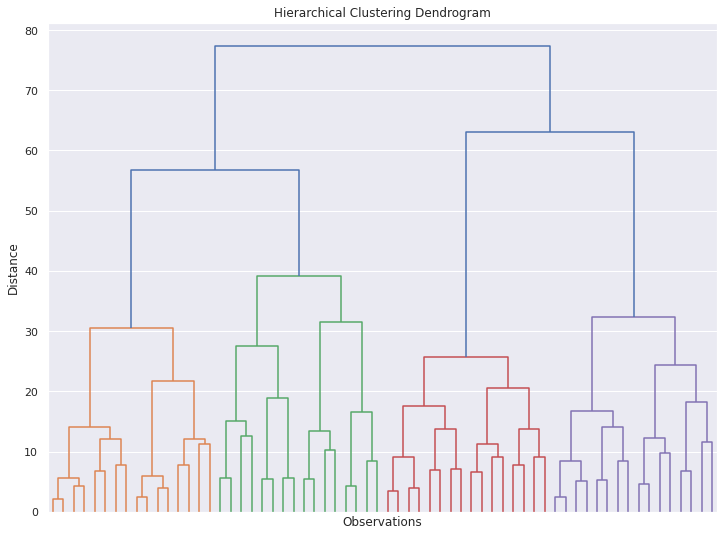

In [9]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

The color tells us optimal  number of cluster. In this case its 3

K-Mean Clustering

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

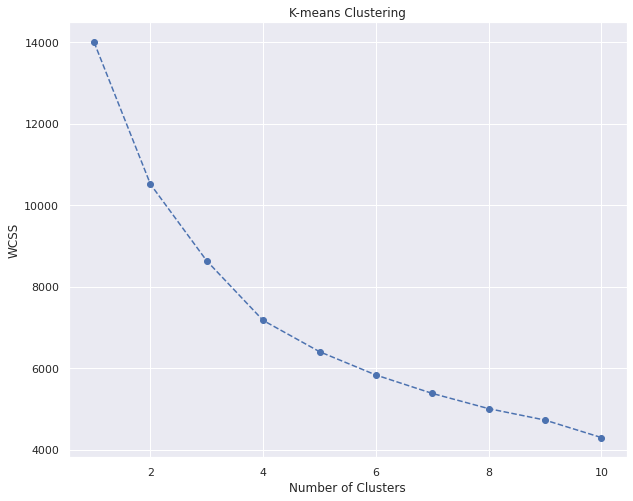

In [11]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

Elbow Method also confirms 3/4 clusters

In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [13]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

Results

In [14]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [15]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,,
0,1.000009e+08,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,1.000013e+08,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,1.000011e+08,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,1.000007e+08,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807




*   Cluster 0: men, married, Age=55, Education= uni, Income = 158k, Occupation= skilled, City size= mid size

*   Cluster 1: men, unmarried, Age=35, Education= high school, Income = 97k, Occupation= unskilled, City size=small
*   Cluster 2: women, married, Age=29, Education= high school, Income = 105k, Occupation= unskilled, City size= small
*   Cluster 3: men, unmarried, Age=35, Education= other, Income = 141K, Occupation= skilled, City size= mid size/big



In [16]:
# value_count of cluster column
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,,
0,1.000009e+08,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,1.000013e+08,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,1.000011e+08,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,1.000007e+08,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [17]:
df_segm_analysis.rename({0:'Well off',   # Older and high income, living in midsize/big city and doing skilled work
  1:'Fewer-Opportunities',     # least earning, living in small city, decent education and low occupation
    2:'Standard',                   # moostly married, min age, educated , earning decent, occupation decent
      3:'Career focused'})          # low on maaridge, avg age, avg education good income and occupation and living in big city    

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,,
Well off,1.000009e+08,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer-Opportunities,1.000013e+08,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,1.000011e+08,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career focused,1.000007e+08,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [18]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Well off',   
                                                                  1:'Fewer-Opportunities',     
                                                                  2:'Standard',                   
                                                                3:'Career focused'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


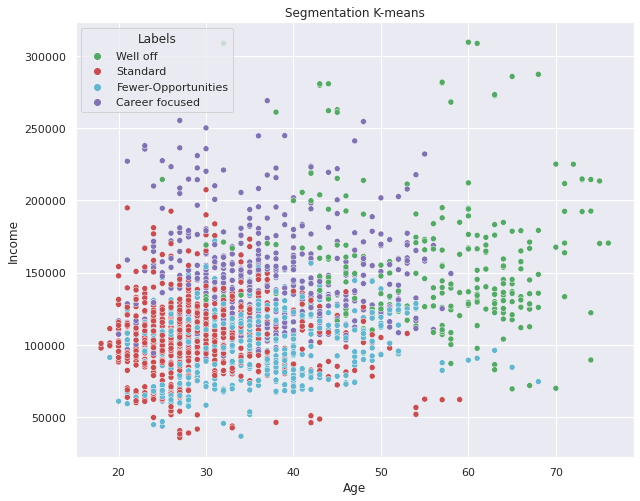

In [19]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

Well off's are clearly visible, but other groups are overlapping

## PCA

In [20]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [21]:
pca.fit(segmentation_std)

PCA()

In [22]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [23]:
df_segmentation.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

Sex and maritial status are able to explain 23% and 16% variability of the data respectively 

Text(0, 0.5, 'Cumulative Explained Variance')

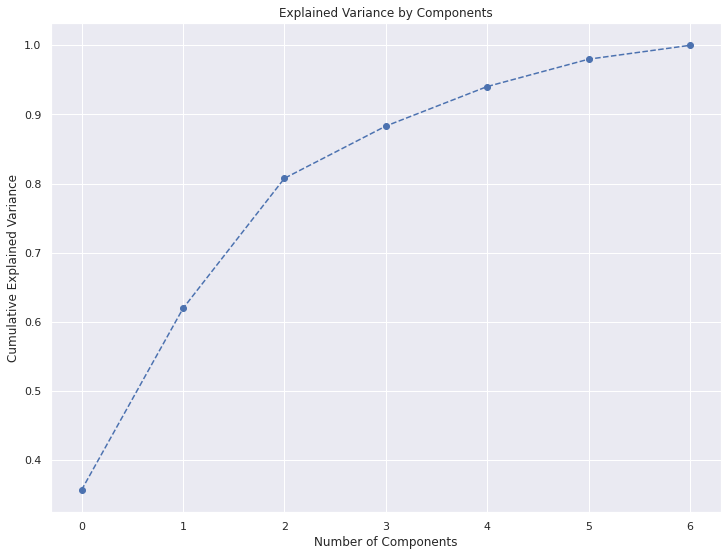

In [24]:
plt.figure(figsize = (12,9))
plt.plot(range(7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Generally, we want to keep around 80 % of the explained variance.


3 or 4 seems the right choice according to the previous graph.

In [25]:
pca = PCA(n_components = 3)

In [26]:
pca.fit(segmentation_std)

PCA(n_components=3)

Results

In [27]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [28]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.iloc[:,1:].columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7f07399e2b90>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

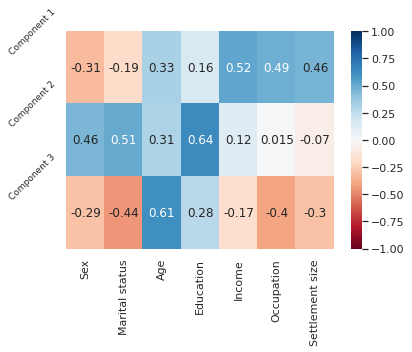

In [29]:
# Heat Map for Principal Components against original features. 
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

Component 1: Features are talking about person's career

Component 2:Features are talking about person's personal life

Component 3: Features (sex, maritial, occupation,age) talking about experience irrespective of life or career 

In [30]:
scores_pca = pca.transform(segmentation_std)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

The 7 individual features are now compressed within 3 main features

## K-mean  + PCA 

In [31]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

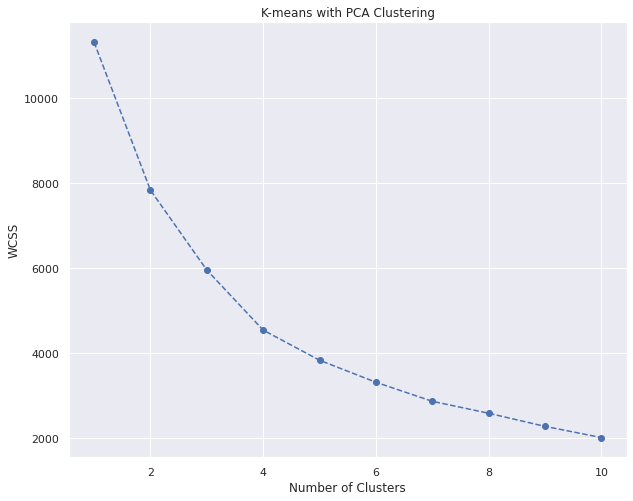

In [32]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [33]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [34]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [35]:
#  new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column added contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,100000002,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,100000003,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,100000004,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,100000005,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,100001997,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,100001998,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,100001999,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [36]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,,
0,1.000011e+08,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,1.000007e+08,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,1.000012e+08,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,1.000009e+08,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039




*   Cluster 0: Standard
*   Cluster 1: 'Career-Focused'
*   Cluster 2: Fewer-Opportunities
*   Cluster 4: Well-Off




In [37]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'Career-Focused',
                                                          2:'Fewer-Opportunities', 
                                                          3:'Well-Off'})
df_segm_pca_kmeans_freq 

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,
standard,1.000011e+08,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Career-Focused,1.000007e+08,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Fewer-Opportunities,1.000012e+08,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Well-Off,1.000009e+08,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [38]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'Career-Focused',
                                                          2:'Fewer-Opportunities', 
                                                          3:'Well-Off'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


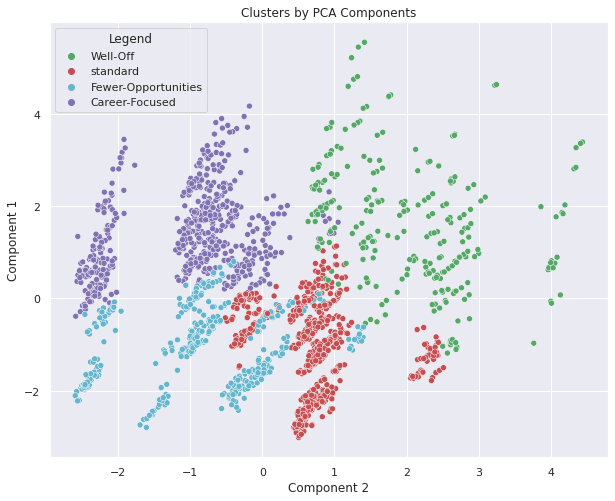

In [39]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

All the 4 clusters are better represented now, as compared to just K-means (which was able to distunguish only well-offs) 

With PCA, features are compressed, by combining them into bigger and meanigful features

The overlap b/w fewer and standard cluster can be explained using different combination of components


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


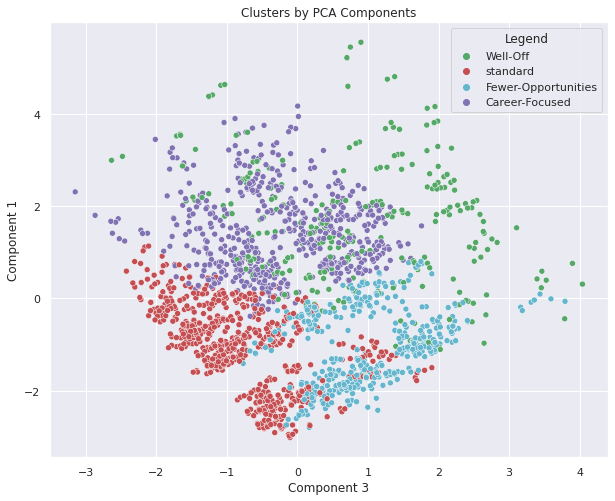

In [40]:
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


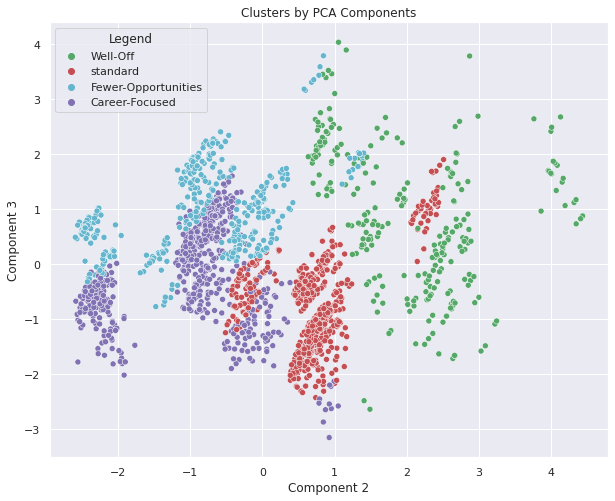

In [41]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

Saving model

In [42]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [43]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [44]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

In [45]:
# from google.colab import files
# files.download('kmeans_pca.pickle')

## Positioning

Answers 3 questions:


1.   Purchase probability
2.   Brand choice probability
3.   Purchase Quantity



#### Descriptive

In [46]:
# In Google Sheets file go to File > Publish to the web > Select .csv (see screenshot) > Copy link
import pandas as pd

path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRNhD_Xowg8OcuEX_rWtS7Nw5J8pelXZY3CvRY_O5gEBiswOSwxetArSUWafbMwZgb5np1EJfjuMsHT/pub?output=csv'
df_purchase = pd.read_csv(path)
df_purchase

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


In [47]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [48]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

In [49]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

In [50]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std) # applied pca model to get pca score

In [51]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca) # applied kmeans +pca
purchase_segm_kmeans_pca

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [52]:
df_purchase_predictors = df_purchase.copy()

In [53]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
df_purchase_predictors

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,2
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,2
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,2
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,2


In [54]:
df_purchase_predictors['Segment'].value_counts()

2    21495
1    13580
0    12123
3    11495
Name: Segment, dtype: int64

In [55]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [56]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [57]:
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [58]:
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean() # taking mean , because single Id can have multiple enteries and hence multiple segment mean will give us the average segment of the ID
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [59]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


In [60]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


Text(0.5, 1.0, 'Segment Proportions')

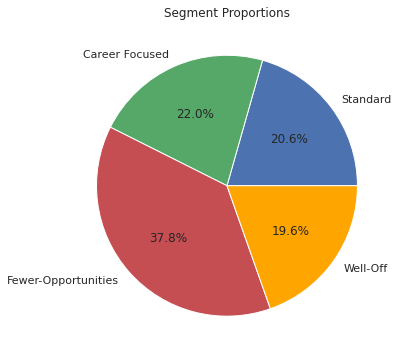

In [61]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')


Fewer opportunities have bought the maximum amount of times
and well-offs the least

Segment Level

In [62]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [63]:
segments_std = df_purchase_descr.groupby(['Segment']).std() # to test homogeneity
segments_std

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,19.039605,16.774464,0.126603
1.0,44.864656,53.744530,0.200056
2.0,16.410498,13.815040,0.120335
3.0,20.716152,25.900579,0.171787


Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

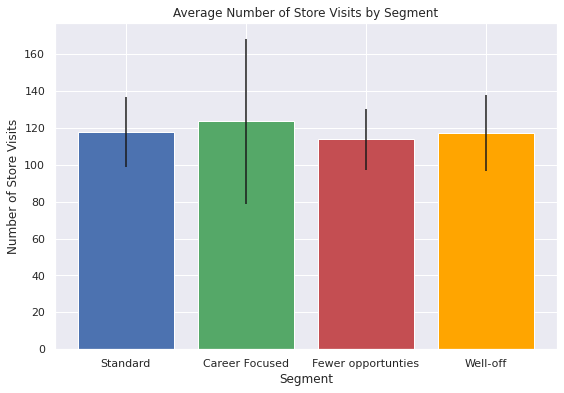

In [64]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career Focused', 'Fewer opportunties', 'Well-off'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Career focused visit the store most, and fewer opportunities visit the least. 

Career focused are the least homogeneous, that means the customers of this group are least alike when it comes to how often they visit stores

Text(0.5, 1.0, 'Number of Purchases by Segment')

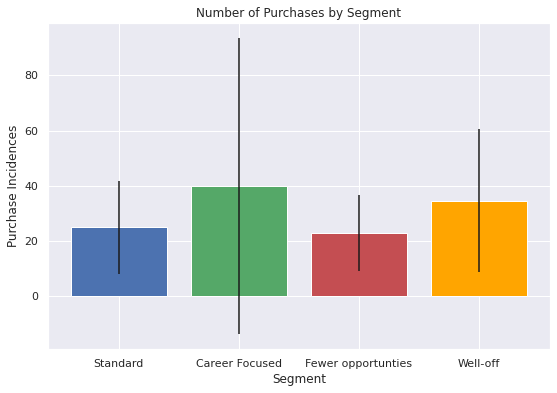

In [65]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career Focused', 'Fewer opportunties', 'Well-off'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

Career focused and well off purchased most

Career focused are least homogeneous, that means customers are group are least alike when it comes to how often they purchase. They all the earning good but there choice of spending it can be different


Text(0.5, 1.0, 'Average Number of Purchases by Segment')

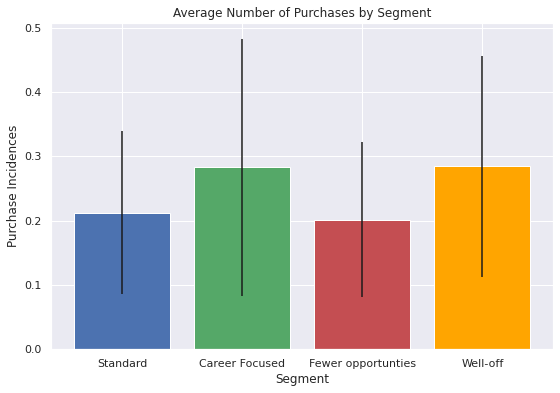

In [66]:
# We display the average number of purchases.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Standard', 'Career Focused', 'Fewer opportunties', 'Well-off'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

Well off and Career focused bought you the most time in the number of times when they visited , but also have high standard deviation meaning there are significant records showing that these groups have different purchase behavior internally

Brand choice

In [67]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [68]:
# Select only rows where incidence is one. In other words, we are only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [69]:
df_purchase_incidence['Brand'].value_counts()

5    4978
2    4542
4    2927
1    1350
3     841
Name: Brand, dtype: int64

In [70]:
# creating brands as dummies
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [71]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()
temp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,2.0
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,3.0
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,2.0
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,2.0
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,0.0
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,2.0
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,0.0


In [72]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.251186,0.396502,0.156481,0.059474,0.136357
1.0,0.072871,0.146808,0.039976,0.112395,0.627951
2.0,0.137567,0.681190,0.020923,0.061548,0.098772
3.0,0.041928,0.117422,0.030610,0.613623,0.196417


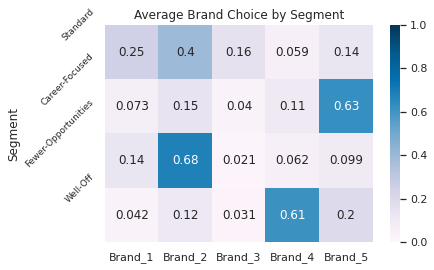

In [73]:
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()



*   Standard: brand 2
*   career focused : brand 5 
*   Fewer opp: brand 2
*   Well off: brand 4


Revenue

To get the revenue of each brand, multiply price with the quantity of purchase (of the brand)

In [74]:
# brand 1
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
# segments_brand_revenue


# brand 2
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']

segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()


# brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']

segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index = False).sum()


# brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']

segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index = False).sum()

# brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']

segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index = False).sum()

# total revenue
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [75]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


Max revenue is generated by Career focused and well-offs and minimum by standard.

#### Purchase Probability

In [76]:
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression

In [77]:
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors
df_pa

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,2,0,0,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,2,0,0,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,2,0,0,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,2,0,0,1,0


In [78]:
# target variable
Y = df_pa['Incidence']


In [79]:
# Y is based on avg price of item 
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [80]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [81]:
model_purchase.coef_

array([[-2.34805968]])

-ve value , signifies with increase in price purchase probability decreses

#### Magnitude of effect of price on purchase probability

Price Elasticity of purchase probability is the % change in purchase probability in response to a 1% change in price

In [82]:
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [83]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].mean().sum()/5

1.998920995689435

Min price is 1.10 and max is 2.8

In [84]:
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, 
# which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [85]:
df_price_range = pd.DataFrame(price_range)

In [86]:
# We predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.(We are interested in this)
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr) # formula for purchase elasticity

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [87]:
# Create price elasticities master data frame.
# It will contain all the elasticities we calculate during the purchase analytics part of the course.
df_price_elasticities = pd.DataFrame(price_range)

In [88]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
pd.options.display.max_rows = None # to print all records 
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096359
1,0.51,-0.100426
2,0.52,-0.104619
3,0.53,-0.108943
4,0.54,-0.113400
5,0.55,-0.117993
6,0.56,-0.122726
7,0.57,-0.127603
8,0.58,-0.132626
9,0.59,-0.137799


In [89]:
df_price_elasticities.describe()

,Price_Point,Mean_PE
count,300.000000,300.000000
mean,1.995000,-3.643856
std,0.867468,2.641779
min,0.500000,-8.113677
25%,1.247500,-6.087771
50%,1.995000,-3.510877
75%,2.742500,-0.998593
max,3.490000,-0.096359


If elasticity has a value smaller than 1 we say its inelastic 

1. For inelastic values, general recommendation is to increase the price as it would not cause a significant decrease in output variable (purchase probability)
2. For elastic values, we should decrease our prices

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

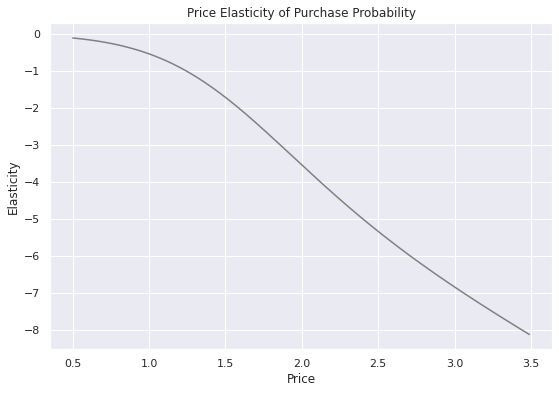

In [90]:
# We display the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative(since coeffecient is -ve). Furthermore we can spot where the customer becomes inelastic.
# But to find the precise spot we can consult the price elasticities data frame.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

The graph starts from being inelastic and then move towards elasticity.

Price cordinates for the transition are: (1.25, -1.00 )

**Observations**

at lower price point,An increase of 1% in price , leads to decrease of less than 1% in PE so here Purchase prob is inelastic


eg: at lower price point, an increase of 1% in price point(1.10), will translate to decrease in 0.69% in price elasticity 


at higher price point, an increase of 1% in price, leads to decrease of 1.70% in PE so here Purchase prob is elastic


eg: an increase of 1% in price point(1.50) , will translate to decrease of 1.70% in price elasticity

#### Purchase probabilty by segment

In [91]:
#career-focused
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [92]:
Y = df_pa_segment_1['Incidence']

In [93]:
X = pd.DataFrame()

In [94]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [95]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [96]:
model_incidence_segment_1.coef_

array([[-1.71243896]])

PE for career focused is less than avg PE (-2.35). This indicates, that this segment is less price sensitive to the avg customers

In [97]:
# Calculate Price Elasticity of the career-focused segment.
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096359,-0.119079
1,0.51,-0.100426,-0.123263
2,0.52,-0.104619,-0.127539
3,0.53,-0.108943,-0.131911
4,0.54,-0.113400,-0.136379
5,0.55,-0.117993,-0.140944
6,0.56,-0.122726,-0.145609
7,0.57,-0.127603,-0.150375
8,0.58,-0.132626,-0.155243
9,0.59,-0.137799,-0.160215


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

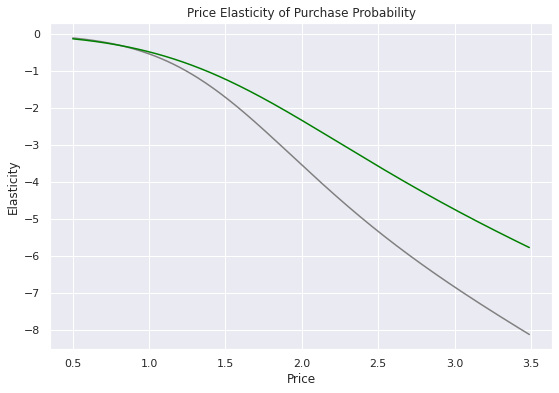

In [98]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

For segmen1 / Career focused, the transition cusp is at 1.39 (unlike 1.25 for the average customers)

In [99]:
# fewer opportunities
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [100]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
print(model_incidence_segment2.coef_)
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

[[-3.63983844]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


PE for fewer opp is more than avg PE (-2.35). This indicates, that this segment is very price sensitive to the avg customers

In [101]:
df_price_elasticities['PE_Segment_2'] = pe_segment2
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2
0,0.50,-0.096359,-0.119079,-0.030923
1,0.51,-0.100426,-0.123263,-0.032690
2,0.52,-0.104619,-0.127539,-0.034544
3,0.53,-0.108943,-0.131911,-0.036488
4,0.54,-0.113400,-0.136379,-0.038528
5,0.55,-0.117993,-0.140944,-0.040666
6,0.56,-0.122726,-0.145609,-0.042908
7,0.57,-0.127603,-0.150375,-0.045258
8,0.58,-0.132626,-0.155243,-0.047721
9,0.59,-0.137799,-0.160215,-0.050301


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

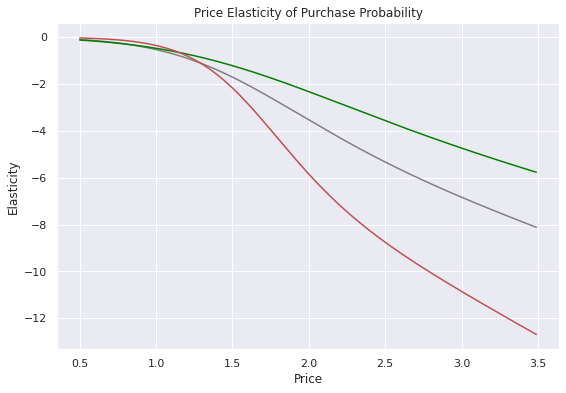

In [102]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Fewer opportunities, transition cusp: 1.27 price point

In [108]:
# standard
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]
# Prepare dependant and independant variables.
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

print(model_incidence_segment0.coef_)
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

[[-1.50710922]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

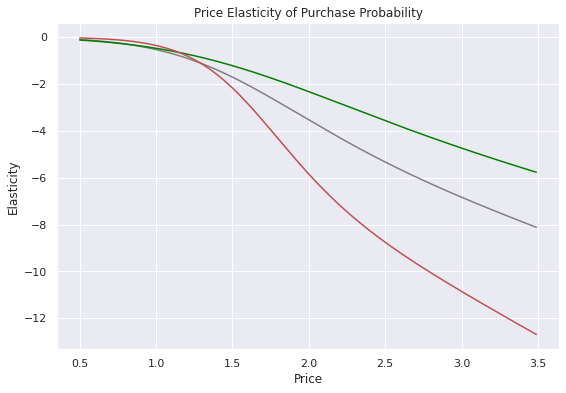

In [104]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [107]:
# well off
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]
# Prepare dependant and independant variables.
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5
# Logistic regression model
model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

print(model_incidence_segment3.coef_)
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

[[-1.24570452]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186
5,0.55,-0.117993,-0.245052,-0.140944,-0.040666,-0.013918
6,0.56,-0.122726,-0.252168,-0.145609,-0.042908,-0.014685
7,0.57,-0.127603,-0.259395,-0.150375,-0.045258,-0.015489
8,0.58,-0.132626,-0.266735,-0.155243,-0.047721,-0.016332
9,0.59,-0.137799,-0.274187,-0.160215,-0.050301,-0.017215


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

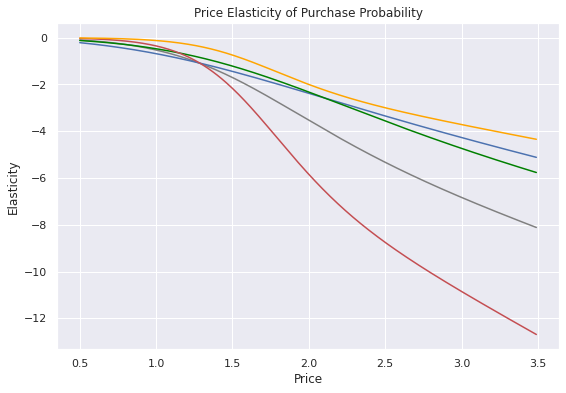

In [109]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
# 2.34 1.71 -3.63 -1.5 -1.243

**Observation**

*   Least elastic: Career focused , so purchase probabilty is not effected much by price
*   Most elastic: fewer opportunities, so purchase probability is effected a lot by price



#### Purchase probability with promotions

In [112]:
# adding one more feature to X
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
2395,2.028,0.0
2396,2.030,0.0
2397,2.030,0.0
2398,1.932,0.6
2399,1.966,0.6


In [113]:
# fitting model and finding coeffecient
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-0.38207089,  0.86489922]])

Shows purchase prob is -vely associated with price and +vely associated with promotions

With Promotions

In [114]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [115]:
# We'll calculate price elasticities of purchase probability when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1

In [116]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [117]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555
5,0.55,-0.117993,-0.245052,-0.140944,-0.040666,-0.013918,-0.107710
6,0.56,-0.122726,-0.252168,-0.145609,-0.042908,-0.014685,-0.109873
7,0.57,-0.127603,-0.259395,-0.150375,-0.045258,-0.015489,-0.112043
8,0.58,-0.132626,-0.266735,-0.155243,-0.047721,-0.016332,-0.114220
9,0.59,-0.137799,-0.274187,-0.160215,-0.050301,-0.017215,-0.116404


Without Promotion

In [118]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})
# We assume there aren't any promotional activities on any of the price points.
df_price_elasticity_promotion_no['Promotion'] = 0
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
df_price_elasticities

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007,-0.135662
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133,-0.138529
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266,-0.141401
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407,-0.144279
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555,-0.147162
5,0.55,-0.117993,-0.245052,-0.140944,-0.040666,-0.013918,-0.107710,-0.150052
6,0.56,-0.122726,-0.252168,-0.145609,-0.042908,-0.014685,-0.109873,-0.152947
7,0.57,-0.127603,-0.259395,-0.150375,-0.045258,-0.015489,-0.112043,-0.155847
8,0.58,-0.132626,-0.266735,-0.155243,-0.047721,-0.016332,-0.114220,-0.158754
9,0.59,-0.137799,-0.274187,-0.160215,-0.050301,-0.017215,-0.116404,-0.161666


With promotion inelastic to elastic transition happens at 3.45 price point whearas for without prmotion it was 3.03

Thats a difference of 40 cents.

The purchase probability elasticity of the customer is less elastic when there is promotion.

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

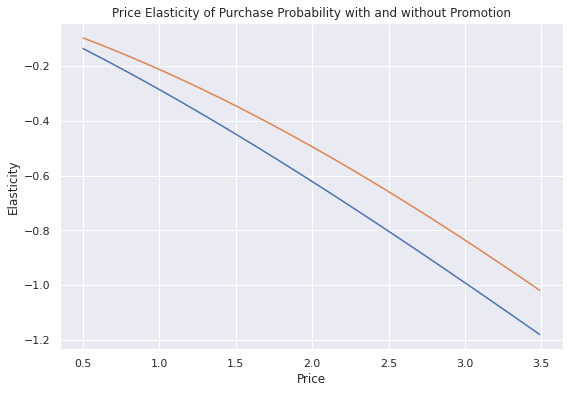

In [119]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

#### Brand Choice

In [121]:
# Hence, we filter our data, to include only purchase occasion, when a purchase has occured. 
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [122]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [123]:
# Our model will predict the brand.
Y = brand_choice['Brand']

features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [124]:
model_brand_choice.coef_

array([[-3.91596367,  0.65845754,  2.41767628,  0.70407639, -0.20212094],
       [ 1.2746136 , -1.87985479, -0.21264162, -0.20634219,  0.58787176],
       [ 1.62419133,  0.5621099 ,  0.50091593,  1.03951992,  0.4527952 ],
       [ 0.57453821,  0.39558861, -1.40060252, -1.24624523,  0.24935218],
       [ 0.44262053,  0.26369873, -1.30534807, -0.2910089 , -1.0878982 ]])

In [125]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915964,0.658458,2.417676,0.704076,-0.202121
1,1.274614,-1.879855,-0.212642,-0.206342,0.587872
2,1.624191,0.562110,0.500916,1.039520,0.452795
3,0.574538,0.395589,-1.400603,-1.246245,0.249352
4,0.442621,0.263699,-1.305348,-0.291009,-1.087898


In [126]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


To read this table, take first column we can see the price of each brand wrt to its coeffiecent is -ve. Because price and purchase are -vely correlated.

While with other brands is +ve. Because more the cost of another brand increases better will be our brand probabilty of purchase

**Own Brand Effect**

How modifying the price of your brand effect your brand

In [127]:
#for brand 5 (most expensive)
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [128]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5) #probability of choosing each of the 5 brands
pr_own_brand_5 = predict_brand_5[: ][:, 4] 


In [129]:
beta5 = bc_coef.iloc[4, 4] # from bc_coef(price vs coeff) table
beta5 

-1.09

In [130]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [131]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007,-0.135662,-0.049056
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133,-0.138529,-0.050617
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266,-0.141401,-0.052207
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407,-0.144279,-0.053827
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555,-0.147162,-0.055478
5,0.55,-0.117993,-0.245052,-0.140944,-0.040666,-0.013918,-0.107710,-0.150052,-0.057159
6,0.56,-0.122726,-0.252168,-0.145609,-0.042908,-0.014685,-0.109873,-0.152947,-0.058871
7,0.57,-0.127603,-0.259395,-0.150375,-0.045258,-0.015489,-0.112043,-0.155847,-0.060615
8,0.58,-0.132626,-0.266735,-0.155243,-0.047721,-0.016332,-0.114220,-0.158754,-0.062391
9,0.59,-0.137799,-0.274187,-0.160215,-0.050301,-0.017215,-0.116404,-0.161666,-0.064200


Transition cusp (inelastic-> elastic) =2.08. 

Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

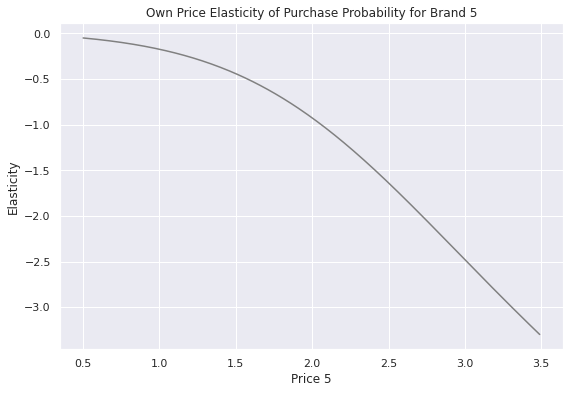

In [132]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

**Cross Brand Effect**

How competitors modifying there price affect your brand  

In [133]:
# brand 4 is just behind brand 5 in terms of price
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [134]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [135]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [136]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [137]:
beta5

-1.09

In [138]:
# The elasticity is equal to negative the price coefficient of the own brand multiplied by the price of the cross brand,
# further multiplied by the probability for choosing the cross brand.
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [139]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007,-0.135662,-0.049056,0.332011
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133,-0.138529,-0.050617,0.337287
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266,-0.141401,-0.052207,0.342507
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407,-0.144279,-0.053827,0.347668
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555,-0.147162,-0.055478,0.352773
5,0.55,-0.117993,-0.245052,-0.140944,-0.040666,-0.013918,-0.107710,-0.150052,-0.057159,0.357820
6,0.56,-0.122726,-0.252168,-0.145609,-0.042908,-0.014685,-0.109873,-0.152947,-0.058871,0.362809
7,0.57,-0.127603,-0.259395,-0.150375,-0.045258,-0.015489,-0.112043,-0.155847,-0.060615,0.367740
8,0.58,-0.132626,-0.266735,-0.155243,-0.047721,-0.016332,-0.114220,-0.158754,-0.062391,0.372614
9,0.59,-0.137799,-0.274187,-0.160215,-0.050301,-0.017215,-0.116404,-0.161666,-0.064200,0.377429


Transition cusp: 2.07

Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

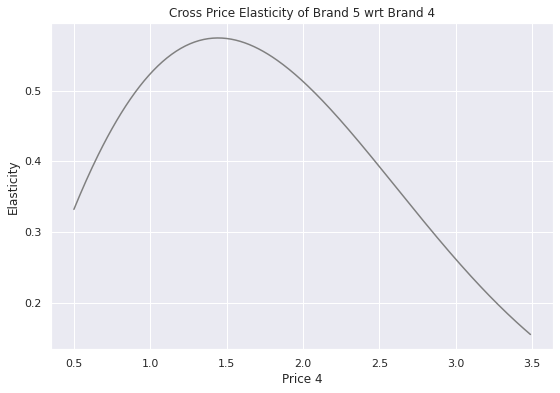

In [140]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

e(cross brand) >0 : then the competition is considered substitute (in our case all the chocholates so all are substitutes and hence y_axis will always be positive)

e(Cross brand) > e(own brand) : then the competition is a strong substitute

**Observation**

1. Y-axis/ Elasticity is +ve. That means purchase probabilty of your brand will increase if the price of compettion increases.
2. In our case e(cross brand)= 2.07 and e(own brand)=2.08, so both are of similar strength.
3. Even with increase in price of Brand 4, it is good for our purchase probability. 

##### Own and cross brand price elasticity by Segment


In [141]:
#well-offs
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [142]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


Own Brand

In [144]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007,-0.135662,-0.049056,0.332011,-0.297321
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133,-0.138529,-0.050617,0.337287,-0.303367
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266,-0.141401,-0.052207,0.342507,-0.309424
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407,-0.144279,-0.053827,0.347668,-0.315491
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555,-0.147162,-0.055478,0.352773,-0.321569
...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012879,-5.052335,-5.682825,-12.541687,-4.292288,-1.003136,-1.164198,-3.231573,0.162233,-3.337318
296,3.46,-8.038130,-5.069193,-5.702986,-12.578604,-4.304923,-1.006961,-1.168093,-3.247767,0.160333,-3.350648
297,3.47,-8.063346,-5.086032,-5.723111,-12.615503,-4.317551,-1.010790,-1.171989,-3.263928,0.158447,-3.363975
298,3.48,-8.088528,-5.102853,-5.743198,-12.652387,-4.330175,-1.014622,-1.175887,-3.280058,0.156576,-3.377299


Cross sell

In [145]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007,-0.135662,-0.049056,0.332011,-0.297321,0.482421
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133,-0.138529,-0.050617,0.337287,-0.303367,0.491726
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266,-0.141401,-0.052207,0.342507,-0.309424,0.501016
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407,-0.144279,-0.053827,0.347668,-0.315491,0.510290
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555,-0.147162,-0.055478,0.352773,-0.321569,0.519548
5,0.55,-0.117993,-0.245052,-0.140944,-0.040666,-0.013918,-0.107710,-0.150052,-0.057159,0.357820,-0.327659,0.528790
6,0.56,-0.122726,-0.252168,-0.145609,-0.042908,-0.014685,-0.109873,-0.152947,-0.058871,0.362809,-0.333760,0.538017
7,0.57,-0.127603,-0.259395,-0.150375,-0.045258,-0.015489,-0.112043,-0.155847,-0.060615,0.367740,-0.339874,0.547227
8,0.58,-0.132626,-0.266735,-0.155243,-0.047721,-0.016332,-0.114220,-0.158754,-0.062391,0.372614,-0.346000,0.556420
9,0.59,-0.137799,-0.274187,-0.160215,-0.050301,-0.017215,-0.116404,-0.161666,-0.064200,0.377429,-0.352139,0.565598


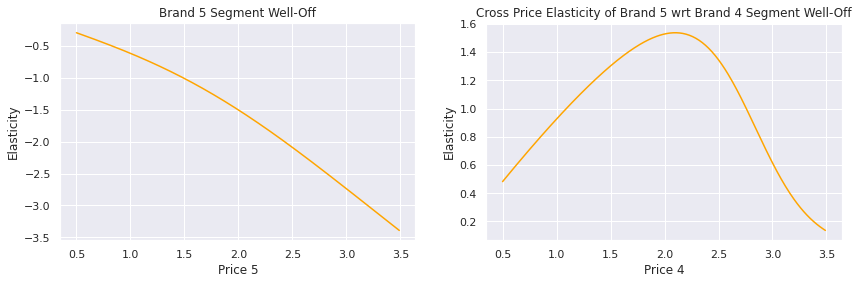

In [146]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

1. Well-offs are negatively associated with the own brand (check graph 1 x-axis range of 2.11 to 2.80) , it can be further validated through graph 
[Correlation brand vs segment](https://colab.research.google.com/drive/1yZ28Vv62ey_mu95XpCyQJTe1Wy5ZGfmL#scrollTo=YoCubx7o7Dyb&line=1&uniqifier=1)
2. let's say Brand 5 product cost 2.4, so PE is ~2 and brand 4 product cost 2.0 its PE is 1.5, so if Brand 4 lower its price by 1%, we will incur loss of 1.5%. 

What we can do is decrease our price by 1%, that will give us 2% increment in purchase probabilty

Standard

In [147]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,0,1,0,0,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,0,1,0,0,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,0,1,0,0,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,0,1,0,0,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,0,1,0,0,0


In [148]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

Own Brand 

In [149]:
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

Cross Brand


In [152]:
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

Career Focused

In [153]:
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [154]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

Own Brand

In [155]:
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

Cross Brand

In [156]:
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

Fewer opportunities

In [157]:
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [158]:
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

Own

In [159]:
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

Cross

In [160]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007,-0.135662,-0.049056,0.332011,-0.115838,0.174117,-0.043940,0.194770,-0.001036,0.181599,-0.297321,0.482421
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133,-0.138529,-0.050617,0.337287,-0.118878,0.176173,-0.045027,0.197254,-0.001098,0.183896,-0.303367,0.491726
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266,-0.141401,-0.052207,0.342507,-0.121951,0.178177,-0.046123,0.199687,-0.001163,0.186144,-0.309424,0.501016
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407,-0.144279,-0.053827,0.347668,-0.125061,0.180131,-0.047228,0.202070,-0.001231,0.188343,-0.315491,0.510290
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555,-0.147162,-0.055478,0.352773,-0.128205,0.182035,-0.048343,0.204402,-0.001303,0.190494,-0.321569,0.519548
5,0.55,-0.117993,-0.245052,-0.140944,-0.040666,-0.013918,-0.107710,-0.150052,-0.057159,0.357820,-0.131386,0.183888,-0.049468,0.206684,-0.001378,0.192597,-0.327659,0.528790
6,0.56,-0.122726,-0.252168,-0.145609,-0.042908,-0.014685,-0.109873,-0.152947,-0.058871,0.362809,-0.134604,0.185692,-0.050602,0.208916,-0.001458,0.194652,-0.333760,0.538017
7,0.57,-0.127603,-0.259395,-0.150375,-0.045258,-0.015489,-0.112043,-0.155847,-0.060615,0.367740,-0.137858,0.187446,-0.051745,0.211099,-0.001541,0.196659,-0.339874,0.547227
8,0.58,-0.132626,-0.266735,-0.155243,-0.047721,-0.016332,-0.114220,-0.158754,-0.062391,0.372614,-0.141150,0.189151,-0.052898,0.213234,-0.001629,0.198619,-0.346000,0.556420
9,0.59,-0.137799,-0.274187,-0.160215,-0.050301,-0.017215,-0.116404,-0.161666,-0.064200,0.377429,-0.144480,0.190808,-0.054062,0.215319,-0.001722,0.200532,-0.352139,0.565598


Text(0.5, 0, 'Price 4')

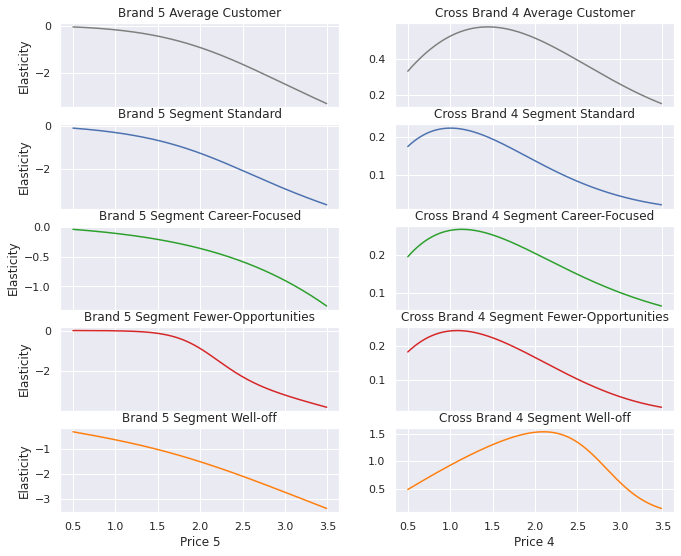

In [161]:

fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

1. Loyal segment to Brand 5: Career-focused and well-offs (they are also the segment that purchase the brand most often)
2. Career focused is most inelastic towards brand 5
3. They don't seem to be affected by price.
4. Well-off purchase brand 4 too, so they are more elastic.
5. To target well-offs we can decrease our price(keep in mind other factors too) 

#### Purchase Quantity

In [162]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [163]:
df_purchase_quantity['Quantity'].describe()

count    14638.000000
mean         2.774559
std          1.796736
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: Quantity, dtype: float64

In [164]:
# Create brand dummies, for each of the five brands.
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 
# and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.581910,0.175229,0.299290,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.028171,0.380176,0.457962,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [166]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

In [167]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [168]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [169]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)
model_quantity.coef_

array([-0.8173651 , -0.10504673])

Price and promotion both are -vely correlated. Signaling even promotions are -vely impacting the purchase quantity (unexpected)

With Promotion

In [170]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [171]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684991

In [172]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [173]:
# calculate the price elasticity with our new formula. It is the beta coefficient for price multiplied by price
# and divided by the purchase quantity.
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [174]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007,-0.135662,-0.049056,0.332011,-0.115838,0.174117,-0.043940,0.194770,-0.001036,0.181599,-0.297321,0.482421,-0.102157
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133,-0.138529,-0.050617,0.337287,-0.118878,0.176173,-0.045027,0.197254,-0.001098,0.183896,-0.303367,0.491726,-0.104413
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266,-0.141401,-0.052207,0.342507,-0.121951,0.178177,-0.046123,0.199687,-0.001163,0.186144,-0.309424,0.501016,-0.106679
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407,-0.144279,-0.053827,0.347668,-0.125061,0.180131,-0.047228,0.202070,-0.001231,0.188343,-0.315491,0.510290,-0.108954
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555,-0.147162,-0.055478,0.352773,-0.128205,0.182035,-0.048343,0.204402,-0.001303,0.190494,-0.321569,0.519548,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012879,-5.052335,-5.682825,-12.541687,-4.292288,-1.003136,-1.164198,-3.231573,0.162233,-3.592453,0.024053,-1.287424,0.068593,-3.746081,0.023407,-3.337318,0.157479,-1.774292
296,3.46,-8.038130,-5.069193,-5.702986,-12.578604,-4.304923,-1.006961,-1.168093,-3.247767,0.160333,-3.606357,0.023697,-1.297233,0.067970,-3.757523,0.022947,-3.350648,0.152057,-1.788634
297,3.47,-8.063346,-5.086032,-5.723111,-12.615503,-4.317551,-1.010790,-1.171989,-3.263928,0.158447,-3.620217,0.023345,-1.307097,0.067352,-3.768945,0.022494,-3.363975,0.146801,-1.803124
298,3.48,-8.088528,-5.102853,-5.743198,-12.652387,-4.330175,-1.014622,-1.175887,-3.280058,0.156576,-3.634034,0.022998,-1.317017,0.066738,-3.780347,0.022049,-3.377299,0.141706,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

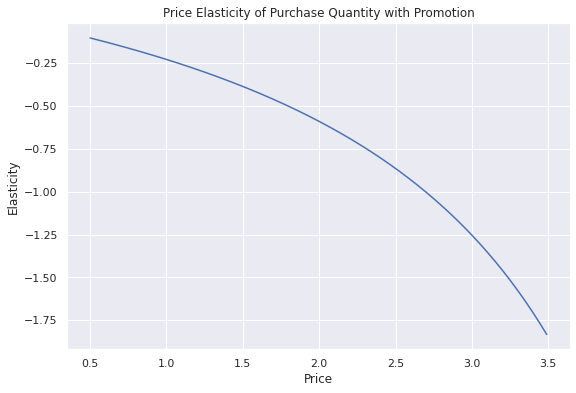

In [175]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

Without promotions

In [176]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096359,-0.211121,-0.119079,-0.030923,-0.010583,-0.097007,-0.135662,-0.049056,0.332011,-0.115838,0.174117,-0.043940,0.194770,-0.001036,0.181599,-0.297321,0.482421,-0.102157,-0.099543
1,0.51,-0.100426,-0.217690,-0.123263,-0.032690,-0.011188,-0.099133,-0.138529,-0.050617,0.337287,-0.118878,0.176173,-0.045027,0.197254,-0.001098,0.183896,-0.303367,0.491726,-0.104413,-0.101736
2,0.52,-0.104619,-0.224367,-0.127539,-0.034544,-0.011822,-0.101266,-0.141401,-0.052207,0.342507,-0.121951,0.178177,-0.046123,0.199687,-0.001163,0.186144,-0.309424,0.501016,-0.106679,-0.103939
3,0.53,-0.108943,-0.231153,-0.131911,-0.036488,-0.012488,-0.103407,-0.144279,-0.053827,0.347668,-0.125061,0.180131,-0.047228,0.202070,-0.001231,0.188343,-0.315491,0.510290,-0.108954,-0.106150
4,0.54,-0.113400,-0.238047,-0.136379,-0.038528,-0.013186,-0.105555,-0.147162,-0.055478,0.352773,-0.128205,0.182035,-0.048343,0.204402,-0.001303,0.190494,-0.321569,0.519548,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012879,-5.052335,-5.682825,-12.541687,-4.292288,-1.003136,-1.164198,-3.231573,0.162233,-3.592453,0.024053,-1.287424,0.068593,-3.746081,0.023407,-3.337318,0.157479,-1.774292,-1.664290
296,3.46,-8.038130,-5.069193,-5.702986,-12.578604,-4.304923,-1.006961,-1.168093,-3.247767,0.160333,-3.606357,0.023697,-1.297233,0.067970,-3.757523,0.022947,-3.350648,0.152057,-1.788634,-1.677205
297,3.47,-8.063346,-5.086032,-5.723111,-12.615503,-4.317551,-1.010790,-1.171989,-3.263928,0.158447,-3.620217,0.023345,-1.307097,0.067352,-3.768945,0.022494,-3.363975,0.146801,-1.803124,-1.690246
298,3.48,-8.088528,-5.102853,-5.743198,-12.652387,-4.330175,-1.014622,-1.175887,-3.280058,0.156576,-3.634034,0.022998,-1.317017,0.066738,-3.780347,0.022049,-3.377299,0.141706,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

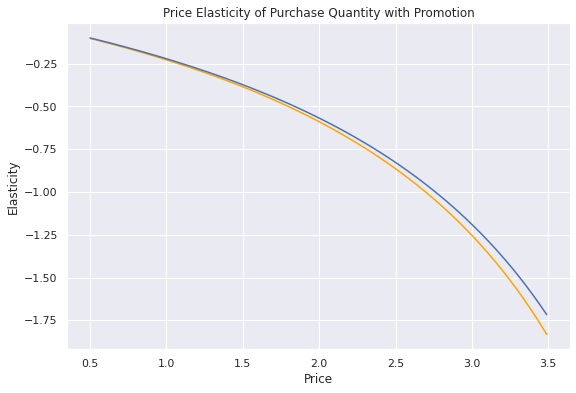

In [177]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

It seems like promotions isn't a significant factor